## 오차행렬

![confusion_matrix](./confusion_matrix.JPG)

* TN : 예측값을 Negative 값 0으로 예측했고, 실제 값 역시 Negative 값 0
* FP : 예측값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0
* FN : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
* TP : 예측값을 Positive 값 1로 예측했는데, 실제 값 역시 Positive 값 1

### 정확도 (Accuracy)
* 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수
* accuracy : (TN + TP) / (TN + FP + FN+TP)

### 정밀도 (Precision) = TP / (FP + TP)
* 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 
* 공식의 분모인 FP + TP는 예측을 Positive로 한 모든 데이터 건수이며, 분자 TP는 예측과 실제 값이 Positive로 일치한 건수
* Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고 함


### 재현율 (Recall) = TP / (FN + TP)
* 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
* 분모는 실제 값이 Positive인 모든 데이터 건수이며, 분자 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수 
* 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고 부른다

## 정밀도/재현율 트레이드 오프 Trade-off)

* 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조해야 할 경우, 분류의 결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.
* 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치가 떨어지기 쉽다 

---

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./data/wisc_bc.csv")

In [3]:
# M : 양성, B : 음성 
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
X_data = df.drop(['id', 'diagnosis'], axis=1)
X_data.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.1242,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.1067,0.07431,0.2998,0.07881


In [5]:
encoder = LabelEncoder()
labels = encoder.fit_transform(df['diagnosis'])

In [6]:
train_input, test_input, train_target, test_target = train_test_split(X_data, labels, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(train_input, train_target)

C:\Users\LimDongKyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [8]:
print (lr.score(train_input, train_target))
print (lr.score(test_input, test_target))

0.9577464788732394
0.972027972027972


In [9]:
import numpy as np
np.set_printoptions(suppress=True)
lr.predict_proba(test_input)

array([[0.99684621, 0.00315379],
       [0.68454368, 0.31545632],
       [0.90429906, 0.09570094],
       [0.00001922, 0.99998078],
       [0.00168031, 0.99831969],
       [0.99268863, 0.00731137],
       [0.00000002, 0.99999998],
       [0.99569616, 0.00430384],
       [0.99793331, 0.00206669],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.00002748, 0.99997252],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.00799707, 0.99200293],
       [0.78516549, 0.21483451],
       [0.0010242 , 0.9989758 ],
       [0.99055951, 0.00944049],
       [0.99999575, 0.00000425],
       [0.99556693, 0.00443307],
       [0.13458825, 0.86541175],
       [0.97635114, 0.02364886],
       [0.00000002, 0.99999998],
       [0.00545537, 0.99454463],
       [0.00000001, 0.99999999],
       [0.00180344, 0.99819656],
       [0.996582  , 0.003418  ],
       [0.        , 1.        ],
       [0.9864862 , 0.0135138 ],
       [0.98717373, 0.01282627],
       [0.

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [11]:
confusion_matrix(test_target, lr.predict(test_input))

array([[91,  1],
       [ 3, 48]], dtype=int64)

In [12]:
print('accuracy : {}'.format(accuracy_score(test_target, lr.predict(test_input))))
print('accuracy :', (91 + 48)  /  (91 + 1 + 3 + 48)) 

accuracy : 0.972027972027972
accuracy : 0.972027972027972


In [13]:
print('precision : {}'.format(precision_score(test_target, lr.predict(test_input))))
print('precision :', 48 / (1 + 48))

precision : 0.9795918367346939
precision : 0.9795918367346939


In [14]:
print('recall : {}'.format(recall_score(test_target, lr.predict(test_input))))
print('recall :', 48 / (3 + 48))

recall : 0.9411764705882353
recall : 0.9411764705882353


In [15]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.1
pred_proba_1 = lr.predict_proba(test_input)[:,-1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
confusion_matrix(test_target, custom_predict )

array([[85,  7],
       [ 0, 51]], dtype=int64)

In [16]:
for thre in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]:
    custom_threshold = thre
    pred_proba_1 = lr.predict_proba(test_input)[:,-1].reshape(-1,1)
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
    custom_predict = binarizer.transform(pred_proba_1)
    print (confusion_matrix(test_target, custom_predict ))
    print (precision_score(test_target, custom_predict ))
    print (recall_score(test_target, custom_predict ))

[[92  0]
 [ 6 45]]
1.0
0.8823529411764706
[[91  1]
 [ 4 47]]
0.9791666666666666
0.9215686274509803
[[91  1]
 [ 3 48]]
0.9795918367346939
0.9411764705882353
[[91  1]
 [ 3 48]]
0.9795918367346939
0.9411764705882353
[[91  1]
 [ 3 48]]
0.9795918367346939
0.9411764705882353
[[90  2]
 [ 1 50]]
0.9615384615384616
0.9803921568627451
[[89  3]
 [ 0 51]]
0.9444444444444444
1.0
[[88  4]
 [ 0 51]]
0.9272727272727272
1.0


In [17]:
from sklearn.metrics import precision_recall_curve

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [19]:
def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

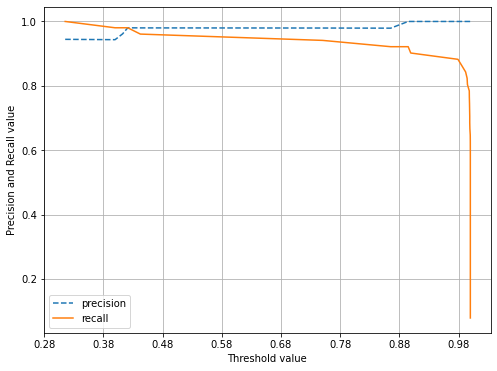

In [20]:
precision_recall_curve_plot(test_target, lr.predict_proba(test_input)[:, 1].reshape(-1,1))

### F1 스코어
* 정밀도와 재현율을 결합한 지표
* F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다
* F1 Score : 2 * (precision * recall) / (precision + recall)

In [21]:
from sklearn.metrics import f1_score

In [22]:
precision = precision_score(test_target, lr.predict(test_input))
recall = recall_score(test_target, lr.predict(test_input))

In [23]:
print('F1 score : {}'.format(f1_score(test_target, lr.predict(test_input))))
print('F1 score : {}'.format( 2 * precision * recall / (precision + recall) ))

F1 score : 0.96
F1 score : 0.96


### ROC 곡선과 AUC
* ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표 
* ROC 곡선(Receiver Operation Characteristic Curve)은 우리말로 수신자 판단 곡선
    > 2차대전 때 통신 장비 성능 평가를 위해 고안된 수치
    
    > 의학 분야에서 많이 사용되고, 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 지표

* ROC 곡선은 FPR(False Positive Rate)이 변활 때 TPR(True Positive Rate)이 어떻게 변하하는지 나타내는 곡선
* FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타남
    > TPR : recall (민감도)
    
    > FPR : FP / (TN + FP) = 1 - TNR = 1 - 특이도

    > TNR (특이도) : TN / (TN + FP)

* ROC 곡선은 FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구한다
* 가운데 직선에 가까울수록 성능이 떨어지고 멀어질수록 성능이 좋다

#### AUC(Area Under Curve)
* 일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며, 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정
* ROC 곡선 밑의 면적을 구하는 것으로, 일반적으로 1에 가까울수록 좋은 수치
* AUC 수치가 커지려면, FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있는지가 중요합니다. 
* 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록, 직사각형에 가까운 곡선이 되어, 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치
* 보통의 분류는 0.5이상의 AUC를 갖는다